This notebbok contents is:

1. Problem
2. Train test split
3. Simple EDA
  * Descritive Statistics and data cleaning
  * numerical features
  * Categorical Features
4. Model variations
 * Apply One-hot encoding
 * Apply Square root transformation
 * Apply Standard scaling
 * Add Polynomial Features

5. Cross-validation and Regularization

 * Linear Regression
 * Lasso Regression (L1)
 * Ridge Regression(L2)
 * Elastic Net Regression (L1 + L2)
 * Compare the metrics

6. Predict on the test set
 * Scatter plots of four models
 * Feature Importance

7. Conclusion


# 1. Problem

The main objective of this analysis is to predict price(£) of uses ford cars using Linear Regressions.

# 2. Train test split

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

pd.options.mode.chained_assignment = None

In [87]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/portifolio/ford_regularization/ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [89]:
df.shape

(17965, 9)

In [90]:
#check duplicated rows
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
159,Focus,2016,10995,Manual,30923,Diesel,0,74.3,1.5
312,Focus,2019,14998,Manual,7000,Petrol,145,58.9,1.0
349,Focus,2019,14998,Manual,7000,Petrol,145,58.9,1.0
510,EcoSport,2019,15489,Manual,5636,Diesel,145,68.9,1.5
512,Grand Tourneo Connect,2019,19999,Manual,3500,Diesel,145,61.4,1.5
...,...,...,...,...,...,...,...,...,...
14556,Mondeo,2015,6793,Manual,138000,Diesel,20,68.9,2.0
15121,Kuga,2017,14999,Manual,24877,Diesel,30,64.2,1.5
15127,EcoSport,2019,16799,Automatic,433,Petrol,150,45.6,1.0
15685,KA,2008,1795,Manual,63000,Petrol,160,45.6,1.3


In [91]:
df.drop_duplicates(keep='first', inplace=True)

In [92]:
#check duplicated rows
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [93]:
df.reset_index(drop=True, inplace=True)

In [94]:
df.shape

(17811, 9)

In [95]:
#split the data

from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, test_size = 0.20, random_state= 0)
print(f'Training and validation set size: {train_val.shape}')
print(f'Test set size: {test.shape}')


Training and validation set size: (14248, 9)
Test set size: (3563, 9)


In [96]:
# Divide the train_val between train and val for cross-validation
train, val = train_test_split(train_val, test_size= 0.25, random_state=0)

print(f'Training set size: {train.shape}')
print(f'Validation set size: {val.shape}')



Training set size: (10686, 9)
Validation set size: (3562, 9)


# 3. Simple EDA

In [97]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14875,Kuga,2016,12000,Manual,21569,Diesel,125,60.1,2.0
10148,B-MAX,2016,9995,Semi-Auto,17900,Petrol,160,44.1,1.6
10329,Fiesta,2017,9280,Manual,28000,Petrol,145,62.8,1.0
5949,Fiesta,2019,16295,Semi-Auto,7698,Petrol,145,48.7,1.0
11779,Mustang,2017,48999,Automatic,7546,Petrol,145,23.5,5.0


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 14875 to 2308
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10686 non-null  object 
 1   year          10686 non-null  int64  
 2   price         10686 non-null  int64  
 3   transmission  10686 non-null  object 
 4   mileage       10686 non-null  int64  
 5   fuelType      10686 non-null  object 
 6   tax           10686 non-null  int64  
 7   mpg           10686 non-null  float64
 8   engineSize    10686 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 834.8+ KB


In [99]:
train.describe()

,year,price,mileage,tax,mpg,engineSize
count,10686.000000,10686.000000,10686.000000,10686.000000,10686.000000,10686.000000
mean,2016.870017,12274.090118,23344.321168,113.443758,57.850926,1.353977
std,2.056717,4771.685341,19499.540207,61.416648,10.169595,0.434362
min,1996.000000,675.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9975.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18229.500000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,30970.000000,145.000000,65.700000,1.500000
max,2060.000000,49999.000000,174000.000000,580.000000,201.800000,5.000000


In [100]:
# Add in new feature age, and remove year
train['age'] = 2021 - train['year']
train.drop(['year'], axis=1, inplace=True)
train

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
14875,Kuga,12000,Manual,21569,Diesel,125,60.1,2.0,5
10148,B-MAX,9995,Semi-Auto,17900,Petrol,160,44.1,1.6,5
10329,Fiesta,9280,Manual,28000,Petrol,145,62.8,1.0,4
5949,Fiesta,16295,Semi-Auto,7698,Petrol,145,48.7,1.0,2
11779,Mustang,48999,Automatic,7546,Petrol,145,23.5,5.0,4
...,...,...,...,...,...,...,...,...,...
14608,Kuga,4352,Manual,128046,Diesel,240,44.1,2.0,12
10355,B-MAX,7599,Manual,32505,Petrol,30,57.7,1.0,7
1446,Fiesta,12610,Manual,13589,Petrol,145,56.5,1.0,2
1860,Focus,8000,Manual,58774,Diesel,0,74.3,1.5,5


In [101]:
#Check the ages to see if there's is outliers
train['age'].unique()

array([  5,   4,   2,   3,   7,   8,   6,  10,   1,  11,   9,  14,  13,
        16,  12,  15,  19,  25,  17, -39,  21])

In [104]:
#Outliers in age
train[train['age'] == -39].index[0]


17572

In [105]:

train.drop(index= train[train['age'] == -39].index[0], axis=1, inplace= True)

In [106]:
# Determine columns by data types

cat_mask = (train.dtypes == np.object)
num_mask = (train.dtypes == np.float64) | (train.dtypes == np.int64)

cat_features = train.columns[cat_mask].tolist()
num_features = train.columns[num_mask].tolist()


print(f'Categorical columns: {cat_features}')
print(f'Numerical columns: {num_features}')



Categorical columns: ['model', 'transmission', 'fuelType']
Numerical columns: ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']


### Numerical Features

In [108]:
def hist_loop(data:  pd.DataFrame,
              rows: int, 
              cols: int,
              figsize: tuple):
  
 """ Returns multiple histograms as subplots
    """

 fig, axes = plt.subplots(rows, cols, figsize=figsize)

 for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns):
      data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
      ax.set_title(f'{sorted(data.columns)[i]} distribution')
      ax.tick_params(axis='x')
      ax.tick_params(axis='y')
      ax.get_yaxis().get_label().set_visible(False)
    
    else:
      fig.delaxes(ax=ax)

 fig.tight_layout()



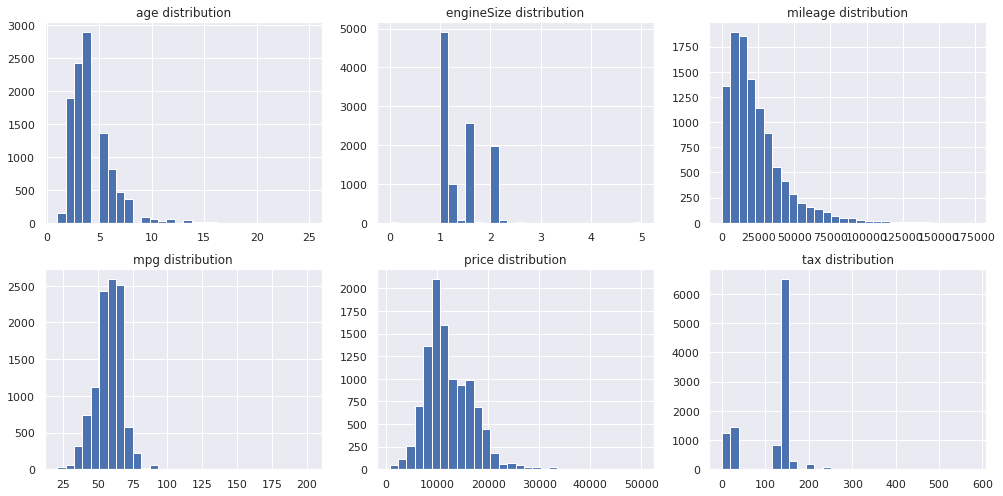

In [109]:
# Plot all numerical features

hist_loop(data=train[num_features], rows=2, cols=3, figsize=(14,7))

Now, let's check the skewness of all numerical features

In [113]:
def skew_df(data: pd.DataFrame, skew_limit: float) -> pd.DataFrame:
  # define a limit above which we will tranform

  skew_vals= data.skew()

  # Showing the skewed columns

  skew_cols = (skew_vals
               .sort_values(ascending=False)
               .to_frame('Skew')
               .query('abs(Skew) > {}'.format(skew_limit)))

  return skew_cols

In [119]:


skew_cols = skew_df(train[num_features], 0.70)
skew_cols

,Skew
engineSize,1.990589
mileage,1.842012
age,1.839659
price,1.162327


· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.  
· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed.   
· If the skewness is less than -1 or greater than 1, the data are highly skewed

A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.

A negative skewness value in the output indicates an asymmetry in the distribution corresponding the tail is larger towards the left hand side of the distribution.

A positive skewness value in the output indicates an asymmetry in the distribution corresponding the tail is larger towards the right hand side of the distribution